<a href="https://colab.research.google.com/github/SoterGarcias/template_portfolio/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Lisboa*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/portugal/lisbon/lisbon/2023-12-17/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://drive.google.com/file/d/1WlVKaE65IeqwvWx6T8Gf5hmKLDl_I1zk/view?usp=sharing1) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.


In [53]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [28]:
# importar o arquivo listings.csv para um DataFrame
# URL do arquivo no Google Drive
url = "https://drive.google.com/file/d/1WlVKaE65IeqwvWx6T8Gf5hmKLDl_I1zk/view?usp=drive_link"

# Extrair o ID do arquivo do link
file_id = url.split("/")[-2]

# Construir o link de download direto
download_link = f"https://drive.google.com/uc?id={file_id}"

# Carregar o arquivo CSV para um DataFrame
df = pd.read_csv(download_link,
                    index_col='id')


## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - O número de avaliações que a listagem teve (nos últimos 12 meses)
* `license`-

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [29]:
# mostrar as 5 primeiras entradas
df.head()

name  host_id host_name  \
id                                                                             
6499    Rental unit in Lisbon · ★4.49 · 1 bedroom · 3 ...    14455     Bruno   
25659   Rental unit in Lisboa · ★4.82 · 1 bedroom · 1 ...   107347     Ellie   
199461  Rental unit in Lisboa · ★4.92 · 2 bedrooms · 3...   914126    Martin   
29248   Rental unit in Lisbon · ★4.57 · 1 bedroom · 2 ...   125768   Bárbara   
208683  Rental unit in Lisbon · ★4.68 · 2 bedrooms · 2...   753902     Bruno   

       neighbourhood_group      neighbourhood  latitude  longitude  \
id                                                                   
6499                Lisboa               Belm  38.69750   -9.19768   
25659               Lisboa  Santa Maria Maior  38.71241   -9.12706   
199461              Lisboa  Santa Maria Maior  38.71095   -9.13673   
29248               Lisboa  Santa Maria Maior  38.71082   -9.12719   
208683              Lisboa  Santa Maria Maior  38.71052   -9.13365   

              room_type  price  minimum_nights  number_of_reviews last_review  \
id                                                                              
6499    Entire home/apt   68.0               3                 63  2023-09-27   
25659   Entire home/apt   71.0               2                199  2023-11-13   
199461  Entire home/apt  199.0               1                195  2023-11-05   
29248   Entire home/apt  105.0               5                372  2023-07-15   
208683  Entire home/apt   60.0               3                124  2022-12-02   

        reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                            
6499                 0.56                               1               283   
25659                1.69                               1               333   
199461               1.34                              16               275   
29248                2.36                               5               129   
208683               0.98                               6               108   

        number_of_reviews_ltm    license  
id                                        
6499                       16        NaN  
25659                      24  56539/AL.  
199461                     41  114187/AL  
29248                      19   23535/AL  
208683                      0   35037/AL

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 22.752 entradas e 75 variáveis (`listings.csv.gz`).

quando o tipo apresenta `object` e a base é um arquivo `.csv` pode considerar tipo como `String`

In [32]:
# identificar o volume de dados do DataFrame
print("Total de linhas: \t {}".format(df.shape[0]))
print("Total de colunas: \t {}\n".format(df.shape[0]))
# verificar as 5 primeiras entradas do dataset
df.dtypes

Total de linhas: 	 22751
Total de colunas: 	 22751



name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* Nas colunas `last_review` e `reviews_per_month` possuem 12% dos seus valores faltantes.
* As variáveis `license` e `price` possuem 6,1% e 5,1% dos seus valores faltantes.


In [38]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

# Calculando a porcentagem de valores ausentes em cada coluna
percent_missing = (df.isnull().sum() / len(df)) * 100

# Ordenando e imprimindo as colunas em ordem decrescente de porcentagens ausentes
print(percent_missing.sort_values(ascending=False))

last_review                       12.979649
reviews_per_month                 12.979649
license                            6.140389
price                              5.103072
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
host_id                            0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
neighbourhood_group                0.000000
host_name                          0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
name                               0.000000
dtype: float64


### **Q3. Qual o tipo de distribuição das variáveis?**

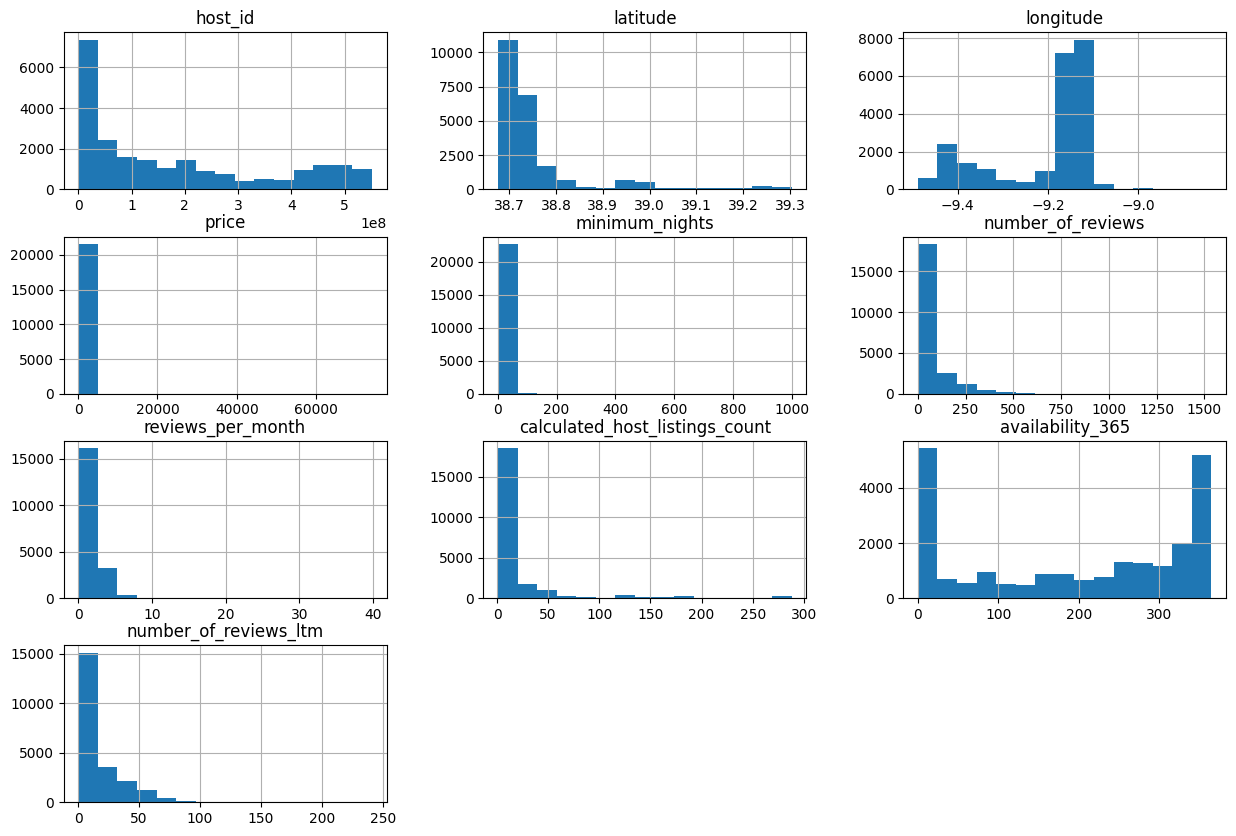

In [39]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [42]:
# ver a média da coluna `price``
print("O custo médio do Airbnb:\t {}".format(df.price.mean()))

O custo médio do Airbnb:	 134.3088930060213


### **Q4. Qual a correlação existente entre as variáveis**

In [43]:
# criar uma matriz de correlação
correlation_matrix = df.corr()

# mostrar a matriz de correlação
print(correlation_matrix)

                                 host_id  latitude  longitude     price  \
host_id                         1.000000  0.035418   0.017445 -0.000279   
latitude                        0.035418  1.000000  -0.369924  0.021245   
longitude                       0.017445 -0.369924   1.000000 -0.053959   
price                          -0.000279  0.021245  -0.053959  1.000000   
minimum_nights                  0.012218 -0.006046   0.005314  0.003021   
number_of_reviews              -0.302661 -0.174034   0.194380 -0.034763   
reviews_per_month               0.050134 -0.201580   0.217135 -0.044566   
calculated_host_listings_count  0.010693 -0.079623   0.116643 -0.008926   
availability_365                0.085446  0.063671  -0.039770 -0.012321   
number_of_reviews_ltm          -0.152194 -0.194641   0.208553 -0.047147   

                                minimum_nights  number_of_reviews  \
host_id                               0.012218          -0.302661   
latitude                            

<ipython-input-43-55150844117f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


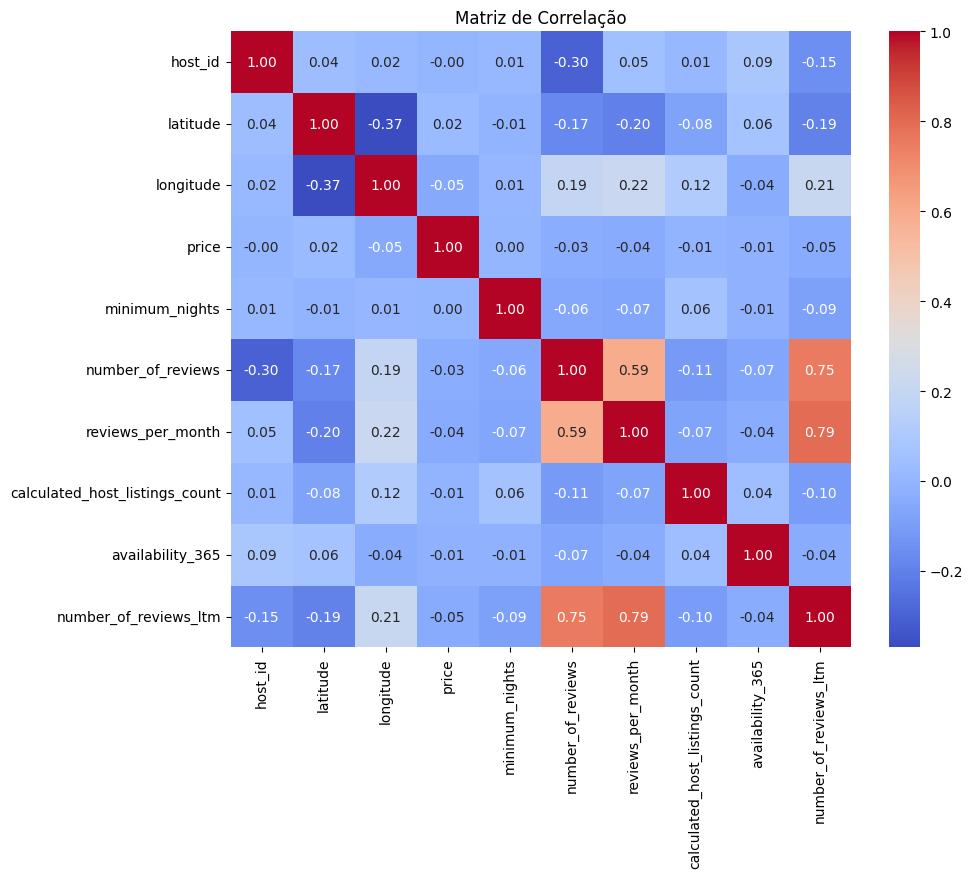

In [44]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Nos dados apresentados de Lisboa na coluna de `room_type` onde é indicado os tipos da locação, 97% de todas as acomodações são só dois tipo:
* `Entire home/apt` - 74%
* `Private room` - 23%

Usando o método `value_counts()` para contar o número de ocorrências de cada tipo de quarto

In [46]:
# mostrar a quantidade de cada tipo de imóvel disponívele a porcentagem de cada tipo de imóvel disponível

#Usando o método value_counts() para contar o número de ocorrências de cada tipo de quarto
room_type_counts = df['room_type'].value_counts()

# Calcule a porcentagem de cada tipo de quarto em relação ao total
total_entries = df.shape[0]
room_type_percentages = (room_type_counts / total_entries) * 100

# Crie um novo DataFrame com as contagens e porcentagens
room_type_summary = pd.DataFrame({'Count': room_type_counts, 'Percentage': room_type_percentages})

# Imprima o novo DataFrame
print(room_type_summary)


                 Count  Percentage
Entire home/apt  16890   74.238495
Private room      5368   23.594567
Shared room        282    1.239506
Hotel room         211    0.927432


### **Q6. Qual a localidade mais cara do dataset?**

Como podemos ver as localidades do Alguber, Vialonga, Sato Isidoro são as tres localizações que tem a média mais cara dese lisboa

Quando pegamos a localização mais cara fica como `Alguber` mas só tem uma unica opção para aluguel e na terceira posição tem `Santo Isidoro`que tem 229 opções, com isso baseado na média não fica real a localização com o maior valor pois vai depender da quantidade de opções por localização e amplitude de valores do mais caro para o mais barato.

Assim não podemos dizer só olhando o preço se uma localização vai ser melhor que outra ou que os locais são melhores ou piores.



In [51]:
# ver preços por bairros, na média
# Agrupar o DataFrame por bairro (neighbourhood) e calcular a média do preço (price) e a contagem de ocorrências
neighborhood_stats = df.groupby('neighbourhood').agg({'price': 'mean', 'neighbourhood': 'count'}).rename(columns={'neighbourhood': 'count'})

# Ordenar os valores médios do preço (price) em ordem decrescente
neighborhood_stats = neighborhood_stats.sort_values(by='price', ascending=False)

# Imprimir o resultado
print(neighborhood_stats)

                                           price  count
neighbourhood                                          
Alguber                               750.000000      1
Vialonga                              515.285714      7
Santo Isidoro                         500.680180    229
Aveiras de Baixo                      336.666667      3
Alenquer (Santo Estvo e Triana)       296.303030     34
...                                          ...    ...
Santo Anto e So Julio do Tojal         57.625000      8
Aveiras de Cima                        52.000000      1
Castanheira do Ribatejo e Cachoeiras   45.000000      1
Ramalhal                               44.800000     10
Casal de Cambra                        40.000000      8

[128 rows x 2 columns]


In [57]:
# plotar os imóveis pela latitude-longitude
# Criar um mapa centrado em uma posição inicial (por exemplo, a média das latitudes e longitudes)
latitude_mean = df['latitude'].mean()
longitude_mean = df['longitude'].mean()
mapa = folium.Map(location=[latitude_mean, longitude_mean], zoom_start=10)

# Adicionar marcadores para cada ponto usando as latitudes e longitudes do DataFrame
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(mapa)

# Exibir o mapa
mapa

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [58]:
# ver a média da coluna `minimum_nights``

df.minimum_nights.mean()

4.453298756098633

## Conclusões

As análises acimas foram realizadas para atender a alguns pontos previamentes estabelecidos não e a base para fins de aprendizado foi escolhida com menos informaçoes que á disponivel no site.

Podemos ver que tem opção de aluguel por todo o pais não só na cidade de lisboa, e temos muitas opções de localizção e em algumas localizações tem varias opções bem proximas as outras com variação nos valores de alugueis.

Predominatimente as opções que tem para aluguel são de Casa/apto inteiro onde representa 73% de todas as opções disponiveis.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 75 atributos disponíveis.

